In [1]:
#Un monitoraggio sulla densità di polveri sottili nell'aria ha condotto alle frequenze riportate di seguito.
# Si calcolino i quartili empirici.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

classi = np.array([[0, 0.5], [0.5, 1], [1, 1.5], [1.5, 2]])
frequenze = [10, 8, 6 ,3]

print ("Le classi da analizzare sono:", classi)
print ("Le frequenze date sono:", frequenze)

Le classi da analizzare sono: [[0.  0.5]
 [0.5 1. ]
 [1.  1.5]
 [1.5 2. ]]
Le frequenze date sono: [10, 8, 6, 3]


Le probabilità sono:  [0.         0.37037037 0.2962963  0.22222222 0.11111111]
I valori dell'asse y:  [ 0 10  8  6  3]
I valori delle probabilità:  [0.         0.37037037 0.2962963  0.22222222 0.11111111]
I valori della funzione di ripartizione empirica:  [0.         0.37037037 0.66666667 0.88888889 1.        ]
Gli indici ricavati sono i seguenti: [1, 2, 3]


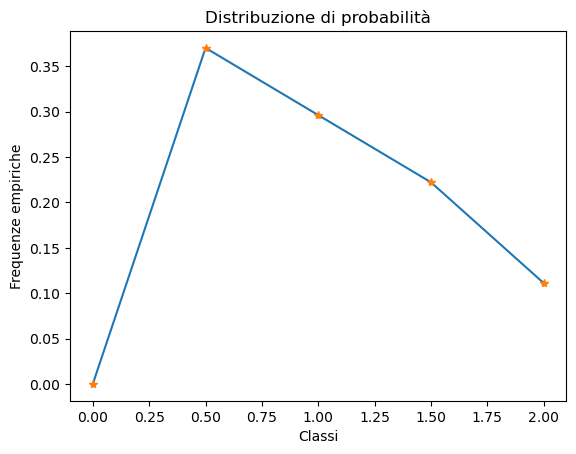

In [3]:
# Passo 1: Determiniamo un indice j tale che F [j-1] < alpha < F [j]

#Determino l'asse x
asse_x = [0, 0.5, 1, 1.5, 2] #semplifichiamo le classi lungo l'asse x

#Determino l'asse 
asse_y = frequenze
asse_y = np.insert (asse_y, 0, 0)

#I valori dei quartili
alpha = [0.25, 0.5, 0.75]

#frequenza empirica
probabilità = asse_y / np.sum (asse_y)
print ("Le probabilità sono: ", probabilità)

#definiamo la funzione di ripartizione cumulativa
F = np.cumsum (probabilità) #prende l'elemento della cella precedente e lo somma con quello corrente oltre a
                            # copiare il valore corrispondente da probabilità a F

print ("I valori dell'asse y: ", asse_y)
print ("I valori delle probabilità: ", probabilità)
print ("I valori della funzione di ripartizione empirica: ", F)

#Se F[j-1] < alpha <= F[j] allora indici[k] = j
indici = [0, 0, 0]
for k in range (3):
    for j in range (1, 5):
        if alpha [k] > F [j-1] and alpha [k] <= F [j]:
            indici [k] = j
            
print ("Gli indici ricavati sono i seguenti:", indici)

#EXTRA: Disegnamo il grafico della distribuzione
plt.title ("Distribuzione di probabilità")
plt.xlabel ("Classi")
plt.ylabel ("Frequenze empiriche")
plt.plot (asse_x, probabilità)
plt.plot (asse_x, probabilità, "*")

plt. show ()

I valori di q_alpha sono [np.float64(0.3375), np.float64(0.71875), np.float64(1.1875)]


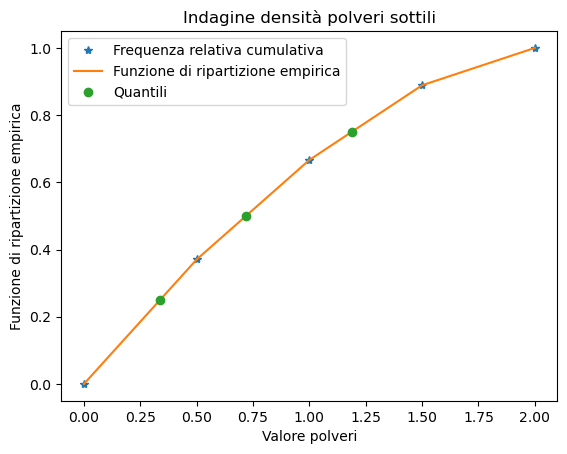

In [4]:
# Passo 2 + Passo 3 -> Ricaviamo i quantili (empirici in questo caso) di ordine alpha

q_alpha = [0, 0, 0] #perchè distinguiamo i 3 quartili
x = asse_x

for k in range (3):
    j = indici [k]
    q_alpha [k] = x [j-1] + (alpha [k] - F [j-1]) * (x [j] - x [j-1]) / (F [j] - F [j-1])

print ("I valori di q_alpha sono", q_alpha)

#Realizziamo il grafico!
plt.plot (x, F, "*", label = "Frequenza relativa cumulativa")
plt.plot (x, F, label = "Funzione di ripartizione empirica")
plt.plot (q_alpha, alpha, "o", label = "Quantili")

plt.legend ()

plt.title ("Indagine densità polveri sottili")
plt.xlabel ("Valore polveri")
plt.ylabel ("Funzione di ripartizione empirica")

plt.show ()